In [38]:
# Remove numpy warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
import cv2 as cv

from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
img_path = '/home/nj/Desktop/Result/50.png'
pb_path = '/home/nj/Desktop/CV/Dataset/frozen_inference_graph.pb'

In [40]:
# Read the graph.
# model downloaded from [2]
with tf.gfile.FastGFile(pb_path, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

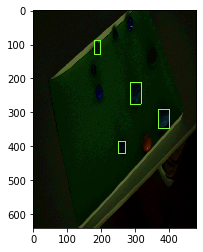

In [45]:
with tf.Session() as sess:
    # Restore session
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    # Read and preprocess an image.
    img = cv.imread(img_path)
    img = cv.resize(img,(480,640))
    
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv.resize(img, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB

    # Run the model
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})

    # Visualize detected bounding boxes.
    num_detections = int(out[0][0])
    for i in range(num_detections):
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.3:
            x = bbox[1] * cols
            y = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            cv.rectangle(img, (int(x), int(y)), (int(right), int(bottom)), (125, 255, 51), thickness=2)

cv.imwrite("/home/nj/Desktop/result_2.jpeg",img)
plt.imshow(img)
plt.show()